<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 4 - Regression </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

# Problem Description
In this assignment, we explore various loss functions and apply gradient descent methods to optimize these functions. The focus is on the Diabetes dataset from the scikit-learn library, which consists of medical diagnostic measurements from numerous patients and is specifically designed to study diabetes progression. The objective is to predict the quantitative measure of disease progression one year after baseline, thus practicing the application of regression analysis in a medical context.

In [38]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### WARMUP :

In [4]:
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

df.info()
df.describe()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
5 -0.076395 -0.041176 -0.096346    97.0  
6 -0.039493 -0.062917 -0.038357   138.0  
7  0.017703 -0.035816  0.003064    63.0  
8 -0.002592 -0.014960  0.011349   110.0  
9 -0.002592  0.067737 -0.013504   310.0

In [5]:
print("\nData types of features:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())


Data types of features:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Missing values per column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [6]:
scaler = StandardScaler()
df[diabetes.feature_names] = scaler.fit_transform(df[diabetes.feature_names])
df.head(10)

age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   
5 -1.948811 -0.938537 -0.855583 -0.408741 -1.450445 -1.666931  0.867796   
6 -0.956004  1.065488 -0.991541 -0.336359 -0.842963 -0.521390  0.016374   
7  1.335088  1.065488 -0.039834  1.400804  1.905174  2.289794  0.480786   
8  0.876870  1.065488  1.297088 -0.843032 -0.293335  0.130383 -0.602843   
9 -1.490592 -0.938537  0.821235 -0.698268 -0.264408 -0.725481 -0.525441   

         s4        s5        s6  target  
0 -0.054499  0.418531 -0.370989   151.0  
1 -0.830301 -1.436589 -1.938479    75.0  
2 -0.054499  0.060156 -0.545154   141.0  
3  0.721302  0.476983 -0.196823   206.0  
4 -0.054499 -0.672502 -0.980568   135.0  
5 -1.606102 -0.865679 -2.025562    97.0  
6 -0.830301 -1.322752 -0.806403   138.0  
7  0.372192 -0.752992  0.064426    63.0  
8 -0.054499 -0.314510  0.238591   110.0  
9 -0.054499  1.424090 -0.283906   310.0

In [7]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Train DataFrame:")
train_df

Train DataFrame:


age       sex       bmi        bp        s1        s2        s3  \
17   1.487828  1.065488  0.254742  1.183659  0.719136  1.038916 -0.835049   
66  -0.192307  1.065488 -0.379729 -0.698268 -0.437974  0.255471 -1.531667   
137  0.113172 -0.938537  1.047832  2.052240 -0.322263 -0.343634 -0.138431   
245 -0.574155 -0.938537 -0.742285 -0.625886 -1.190096 -1.232416  0.635590   
31  -0.497786 -0.938537 -1.376756 -1.711613 -0.814035 -1.127079  1.254806   
..        ...       ...       ...       ...       ...       ...       ...   
106 -2.025181 -0.938537 -1.603353 -0.915414 -0.958674 -0.732065  0.171178   
270  0.113172  1.065488  0.639957  1.762713 -0.785107 -0.995407  0.325982   
348  0.647761 -0.938537 -0.425049 -0.119214 -0.090841 -0.620144  1.641816   
435 -0.268676 -0.938537 -0.493028 -0.843032 -0.351191  0.097465 -0.370637   
102 -1.948811 -0.938537  0.594638 -0.336359  0.776992  0.525397  1.177404   

           s4        s5        s6  target  
17   0.721302  0.575296 -0.022657   144.0  
66   1.497104  0.005729  0.412757   150.0  
137 -0.054499  0.358163 -0.283906   280.0  
245 -0.830301 -1.048508 -2.722224   125.0  
31  -1.606102 -0.780589 -0.893485    59.0  
..        ...       ...       ...     ...  
106 -0.830301 -1.250310 -1.764314   134.0  
270 -0.830301  0.181658  0.325674   202.0  
348 -0.830301 -0.229228 -0.022657   148.0  
435 -0.054499 -0.808569 -0.806403    64.0  
102 -0.830301 -0.108108 -0.022657   302.0  

[353 rows x 11 columns]

In [8]:
print("\nTest DataFrame:")
test_df


Test DataFrame:


age       sex       bmi        bp        s1        s2        s3  \
287  0.953240 -0.938537 -0.130473 -0.336359  2.628368  2.632139  0.403384   
211  1.946046 -0.938537  0.775915  0.459841 -0.524757 -0.350218  0.016374   
72   1.335088  1.065488 -0.085153 -0.263977  2.165524  1.025748  1.177404   
321  2.022416 -0.938537  1.093151  1.666445  1.153052  0.768989 -1.609069   
73   0.265912  1.065488 -0.425049 -0.046832  0.805919  1.117918 -0.138431   
..        ...       ...       ...       ...       ...       ...       ...   
255  0.036803 -0.938537 -1.376756 -0.119214 -0.148697 -0.409470  0.867796   
90   0.265912 -0.938537 -0.538347 -0.843032 -0.640468 -0.949322  1.641816   
57  -0.574155 -0.938537 -1.331437 -1.060177 -1.884362 -2.193617  1.100002   
391 -0.497786 -0.938537 -1.467395 -1.349704 -1.247951 -1.061243  0.403384   
24  -1.337853 -0.938537  0.753256 -0.481123 -0.640468 -0.396303 -0.138431   

           s4        s5        s6  target  
287  0.721302  0.681851 -0.109740   219.0  
211 -0.830301 -0.473383 -0.458071    70.0  
72  -0.054499  1.776333 -0.370989   202.0  
321  2.971127  2.073957  1.283585   230.0  
73   0.721302 -0.108108 -0.196823   111.0  
..        ...       ...       ...     ...  
255 -0.830301 -0.069396  0.151508   153.0  
90  -1.606102 -1.516504  0.238591    98.0  
57  -1.606102 -1.180551 -1.415982    37.0  
391 -0.830301 -1.873921 -1.067651    63.0  
24  -0.054499 -0.545633 -1.154734   184.0  

[89 rows x 11 columns]

### Part1 : Functions’ Implementation

1. Mean Squared Error (MSE):
    > It is always non – negative and values close to zero are better.The MSE is heavily penalised by outliers due to their significantly large square value.
    > $$MSE =  \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\ n} $$
2. Root Mean Squared Error (RMSE):
    > The RMSE is not as heavily penalised by outliers as the MSE.
    > $$RMSE =  \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\ n}} $$    
3.  Mean Absolute Error (MAE)  
    > MAE measures the average magnitude of the errors between the predicted values and the true values. It is less sensitive to outliers compared to MSE and RMSE.
    > MAE is calculated as the average of the absolute differences between the true values and the predicted values 
    > $$MAE =  \frac{\sum_{i=1}^{n} abs(y_i - \hat{y_i})}{\ n} $$
 
4. R2_SCORE:
    > $$R^2  score = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In [9]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

### Part2 : Building and Training the Linear Regression Model

In [10]:
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Part 3 : Model Evaluation

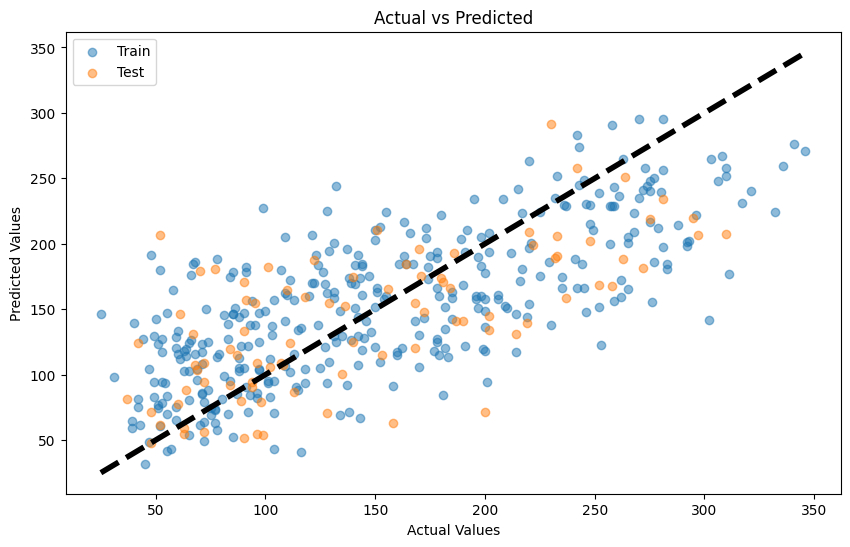

In [11]:
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred, alpha=0.5, label='Test')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [14]:
print('Testing set evaluation:')
print(f"    MSE:{mse(y_test, y_pred)}")
print(f"    MAE:{mae(y_test, y_pred)}")
print(f"    RMSE:{rmse(y_test, y_pred)}")
print(f"    R² score:{r2_score(y_test, y_pred)}")

print("Training set evaluation:")
print(f"    MSE:{mse(y_train, y_train_pred)}")
print(f"    MAE:{mae(y_train, y_train_pred)}")
print(f"    RMSE:{rmse(y_train, y_train_pred)}")
print(f"    R² score:{r2_score(y_train, y_train_pred)}")

Testing set evaluation:
    MSE:2900.193628493482
    MAE:42.794094679599944
    RMSE:53.85344583676593
    R² score:0.45260276297191937
Training set evaluation:
    MSE:2868.5497028355776
    MAE:43.483503523980396
    RMSE:53.55884336723094
    R² score:0.5279193863361498


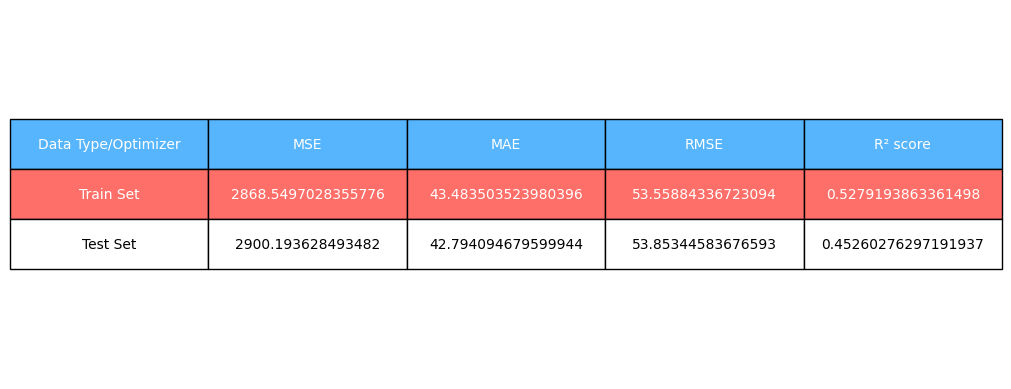

In [15]:
train_metrics = [mse(y_train, y_train_pred), mae(y_train, y_train_pred), rmse(y_train, y_train_pred), r2_score(y_train, y_train_pred)]

test_metrics = [mse(y_test, y_pred), mae(y_test, y_pred), rmse(y_test, y_pred), r2_score(y_test, y_pred)]

data = [['Train Set'] + train_metrics, ['Test Set'] + test_metrics]

columns = ['Data Type/Optimizer', 'MSE', 'MAE', 'RMSE', 'R² score']

fig, ax = plt.subplots()

ax.axis('off')

table = ax.table(cellText=data, colLabels=columns, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 3)
for i in range(len(data)):
    for j in range(len(columns)):
        cell = table[i, j]
        cell.set_facecolor('#56b5fd' if i % 2 == 0 else '#ff6f69')
        cell.set_text_props(color='w')

plt.show()


### Part 4 : Ordinary Least Squares

In [27]:
y_train_reshaped = np.expand_dims(y_train, axis=0)
X_train_transposed = X_train.T

In [45]:
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           5.41e-50
Time:                        20:05:04   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3456      2.902     52.155      0.0

In [42]:
y_train_pred = results.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_test_pred = results.predict(X_test_const)

In [43]:
print("Testing set evaluation:")
print(f"    MSE:{mse(y_test, y_test_pred)}")
print(f"    MAE:{mae(y_test, y_test_pred)}")
print(f"    RMSE:{rmse(y_test, y_test_pred)}")
print(f"    R² score:{r2_score(y_test, y_test_pred)}")

print("Training set evaluation:")
print(f"    MSE:{mse(y_train, y_train_pred)}")
print(f"    MAE:{mae(y_train, y_train_pred)}")
print(f"    RMSE:{rmse(y_train, y_train_pred)}")
print(f"    R² score:{r2_score(y_train, y_train_pred)}")

Testing set evaluation:
    MSE:2900.1936284934827
    MAE:42.794094679599944
    RMSE:53.85344583676594
    R² score:0.45260276297191926
Training set evaluation:
    MSE:2868.549702835578
    MAE:43.483503523980396
    RMSE:53.55884336723094
    R² score:0.5279193863361497


### Question 1. Analyze and evaluate the values in Table (1) in part 3.
The **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **Root Mean Squared Error (RMSE)** are measures of the model's prediction error, with lower values indicating better performance. The **R² Score** represents the proportion of variance for the dependent variable that's explained by the independent variables in the model, with a higher score indicating better explanatory power.

- The model's performance on the training set is slightly better than on the testing set, which is expected as models tend to perform better on data they have seen before.
- The R² Score shows a moderate fit for the training data and a lower fit for the testing data, suggesting the model may not generalize well to unseen data.
- The difference between the training and testing performance is not very large, which is good as it indicates there might not be significant overfitting.

For further improvement, consider:
- **Feature Engineering**: Adding or transforming features to improve model fit.
- **Model Complexity**: Assessing if a more complex model could capture patterns better.

Remember, the ultimate goal is to minimize the error metrics while maximizing the R² Score on unseen data.

### Question 2. Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.

R-squared (R²) and Adjusted R-squared (Adjusted R²) are both metrics used to evaluate the goodness of fit of a regression model.

***R-squared (R²):***     
> R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model.
> It ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean.
> A higher R² value indicates that more variability in the dependent variable is explained by the independent variables, and the model fits the data better.
> However, R² can be artificially inflated by adding more predictors to the model, even if they are not useful. It does not penalize for overfitting.     
      
***Adjusted R-squared (Adjusted R²):***       
> Adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in the model.
> It penalizes the addition of unnecessary predictors, unlike R-squared, which can increase even with the addition of irrelevant predictors.
> Adjusted R-squared can be negative if the model fits the data worse than a horizontal line.
> It is always less than or equal to R-squared.        
      
***Implications of High or Low Values:***      
   > **High R²/Adjusted R²:** A high value indicates that a large proportion of the variance in the dependent variable is explained by the independent variables. It suggests that the model provides a good fit to the data. However, it does not necessarily mean that the model is the best possible or that it predicts future observations well.      
   > **Low R²/Adjusted R²:** A low value suggests that the independent variables do not explain much of the variance in the dependent variable. It may indicate that the model is not capturing the underlying relationships in the data well.       
             
***Differences between R² and Adjusted R²:***      
   > - **Penalty for Complexity:** Adjusted R² penalizes the addition of unnecessary predictors, whereas R² does not.      
   > - **Dependence on Number of Predictors:** R² increases with the addition of more predictors, whereas Adjusted R² only increases if the additional predictors improve the model beyond what would be expected by chance.      
   > - **Interpretation of Results:**       
    * If both R² and Adjusted R² are high, it indicates that the model explains a significant amount of variance in the dependent variable, and the predictors are likely relevant.      
    * If R² is high but Adjusted R² is relatively lower, it suggests that the model may be overfitting the data, especially if there are many predictors.
    * If both R² and Adjusted R² are low, it indicates that the model may not be capturing the relationship between the variables well, and additional features or a different model may be needed.

### Question 3: Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.

**Statistical Significance:** A p-value less than a chosen significance level (commonly 0.05) indicates that the coefficient (and thus the corresponding feature) is statistically significant. It suggests that there is a significant relationship between the feature and the target variable.       

**Lack of Significance:** A p-value greater than the significance level suggests that the coefficient is not statistically significant. In other words, the corresponding feature may not have a significant effect on the target variable.
An appropriate value for p-values is typically `less than 0.05`, which means that there is less than a 5% chance that the observed relationship between the feature and the target variable is due to random chance alone.

Let's review the p-values obtained in part 4 for each column of data and discuss their significance:

- Intercept (const): The p-value for the intercept is 0.000, indicating its statistical significance. As expected, the intercept represents the baseline disease progression value when all predictors are zero.
- Age: The p-value for age is 0.583, which is greater than the 0.05 significance level. This suggests that age may not be a statistically significant predictor of disease progression one year after baseline.
- Sex: The p-value for sex is 0.000, indicating its statistical significance. It suggests that sex has a significant effect on disease progression one year after baseline.
- Body Mass Index (BMI): The p-value for BMI is 0.000, indicating its statistical significance. This implies that BMI is a significant predictor of disease progression one year after baseline.
- Average Blood Pressure (BP): The p-value for BP is 0.000, indicating its statistical significance. It suggests that average blood pressure is a significant predictor of disease progression one year after baseline.
- Six blood serum measurements (s1, s2, s3, s4, s5, s6): These are coefficients for various blood serum measurements. Among these, the p-value for s1 and s4 are 0.040 and 0.000, indicating their statistical significance at the 5% significance level. However, the p-values for the other serum measurements range from 0.156 to 0.508, suggesting that they may not be statistically significant predictors of disease progression one year after baseline.
In summary, age may not be a significant predictor of disease progression, while sex, BMI, BP,s4(tch) and possibly s1 (tc) are statistically significant predictors. The other serum measurements may not be significant predictors at the 5% significance level.

### Question 4: Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition.

1. Age:
The p-value for age is 0.583, indicating that it may not be a statistically significant predictor of disease progression one year after baseline. However, age is an important factor in diabetes management, as older individuals may have different health outcomes compared to younger individuals.
2. Sex:
The p-value for sex is 0.000, indicating its statistical significance. This suggests that sex is an important predictor of disease progression one year after baseline. It implies that there may be differences in disease progression between males and females.
3. Body Mass Index (BMI):
The p-value for BMI is 0.000, indicating its statistical significance. BMI is a critical factor in diabetes management, as higher BMI values are associated with increased risk of diabetes complications.
4. Average Blood Pressure (BP):
The p-value for BP is 0.000, indicating its statistical significance. Blood pressure is a key indicator of cardiovascular health and is closely linked to diabetes complications such as heart disease and stroke.
5. Six blood serum measurements (s1, s2, s3, s4, s5, s6):
Among these measurements, only s1 (tc) and s4 has a statistically significant p-value of 0.040 and 0.000. This suggests that total serum cholesterol (tc) and total cholesterol / HDL (tch) are important predictors of disease progression one year after baseline. The other serum measurements may not be significant predictors at the 5% significance level.
     
***Importance of Features:***
   - Sex, BMI, and Blood Pressure: These factors are statistically significant predictors of disease progression and are crucial indicators in managing an individual's diabetic condition. They provide valuable insights into the risk and progression of diabetes-related complications.
   - Age: While age may not be statistically significant in this analysis, it remains an essential factor in diabetes management due to its association with increased risk of complications and changes in health outcomes over time.
   - Serum Measurements: Total serum cholesterol (tc) and total cholesterol / HDL (tch) are significant predictors among the six blood serum measurements. Understanding lipid levels, along with other biochemical markers, can help assess cardiovascular risk in diabetic individuals.
In conclusion, based on the analysis, sex, BMI, blood pressure,tc and tch are important features in predicting disease progression in individuals with diabetes. These factors play crucial roles in managing and assessing an individual's diabetic condition and their associated risks